# Installation

- ## Dependency on cmake:
    1. Download .tar.gz file from cmake website
    2. `tar xvzf cmake-3.18.0-rc1.tar.gz`
    3. `cd cmake-3.18.0-rc1`
    4. `./bootstrap`
    5. `make`
    6. `nano ~/.bash_profile` 
    7. `export PATH=$PATH:/Users/changhua/cmake-3.18.0-rc1/bin`
    8. `source ~/.bash_profile`


- ## Compiling SimpleElastix On Linux

    - `   
    git clone https://github.com/SuperElastix/SimpleElastix
    mkdir build
    cd build
    cmake ../SimpleElastix/SuperBuild
    make -j4
    `
### Side Note: 
    - Ruby compilation run into error in FindRuby; to tackle, in CMakeCache.txt, in the line //Wrap Ruby
WRAP_RUBY:BOOL=ON change it to WRAP_RUBY:BOOL=OFF
    - 
    `
    //Wrap Ruby
WRAP_RUBY:BOOL=OFF
    `
    - The make process took a long time to run, and waited for around 2 hours on Mac OS
    
- ## Install the python module into system:
    - `{BUILD_DIRECTORY}/SimpleITK-build/Wrapping/Python`    
    - `sudo python Packaging/setup.py install`     

## Hello World

In [20]:
import SimpleITK as sitk
%matplotlib inline
from matplotlib import pyplot as plt
from skimage.io import imread, imsave, imshow
from skimage.transform import resize as imresize
from os.path import join
import imagecodecs

In [21]:
data_dir = r'./data/rigid_example/'

fix_name = r'fixedImage.png'
moving_name = r'movingImage.png'
result_name = r'result.png'

fix_path = join(data_dir, fix_name)
moving_path = join(data_dir, moving_name)
result_path = join(data_dir, result_name)

fixedImage = imread(fix_path)
movingImage = imread(moving_path)

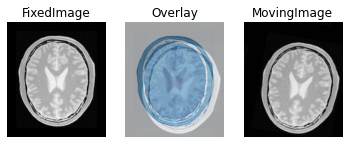

In [22]:
fig = plt.figure()
fixed = fig.add_subplot(1, 3, 1)
plt.imshow(fixedImage, cmap="gray")
fixed.axis('off')
fixed.set_title('FixedImage')

overlay = fig.add_subplot(1, 3, 2)
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
overlay_1 = plt.imshow(movingImage, cmap="Reds",alpha = 0.7)
overlay_2 = plt.imshow(fixedImage, cmap="Blues",alpha = 0.5)
overlay.axis('off')
overlay.set_title('Overlay')

moving = fig.add_subplot(1, 3, 3)
plt.imshow(movingImage, cmap="gray")
moving.axis('off')
moving.set_title('MovingImage')

plt.show()

In [23]:
def plt_overlay(f_path,m_path):
    fixedImage = imread(f_path)
    movingImage = imread(m_path)
    
    fig = plt.figure(figsize = (10,10))
    fixed = fig.add_subplot(1, 3, 1)
    plt.imshow(fixedImage, cmap="gray")
    fixed.axis('off')
    fixed.set_title('FixedImage')

    overlay = fig.add_subplot(1, 3, 2)
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    overlay_1 = plt.imshow(movingImage, cmap="Reds",alpha = 0.7)
    overlay_2 = plt.imshow(fixedImage, cmap="Blues",alpha = 0.5)
    overlay.axis('off')
    overlay.set_title('Overlay')

    moving = fig.add_subplot(1, 3, 3)
    plt.imshow(movingImage, cmap="gray")
    moving.axis('off')
    moving.set_title('MovingImage')

    plt.show()
    return

In [24]:
fixedImage = sitk.ReadImage(fix_path,sitk.sitkFloat32)
movingImage = sitk.ReadImage(moving_path,sitk.sitkFloat32)

parameterMap = sitk.GetDefaultParameterMap('translation')

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(parameterMap)
elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()


In [25]:
resultImage.GetPixelIDTypeAsString()

'32-bit float'

In [26]:
# writer = sitk.ImageFileWriter()
# writer.SetFileName(outputImageFileName)
# writer.Execute(image)

sitk.WriteImage(sitk.Cast(resultImage,sitk.sitkUInt8),result_path)

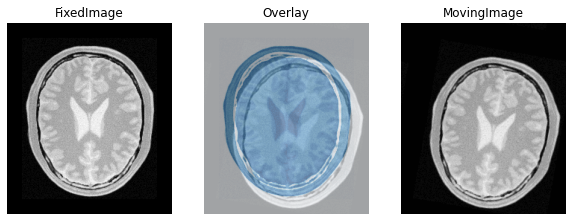

In [27]:
plt_overlay(fix_path,moving_path)

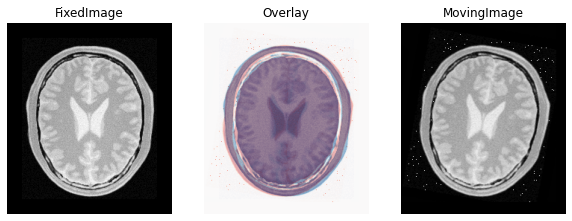

In [28]:
plt_overlay(fix_path,result_path)

## Rigid Registration

> A rigid transform can register objects that are related by rotation and translation. For example, if you are registering images of a patient’s bones, you can often assume that a rigid transform is sufficient to align these structures. In fact, it is often advantageus to chose a simple transform if problems that allows it, as this constrains the solution space and ensures no spurious non-rigid local minima affect your results. Think of it as a way of embedding expert knowledge in the registration procedure.

> Rigid registration is one of the simplest of methods in the catagory of linear transformation models and is often used as initialization for affine- and non-rigid transforms.



In [29]:
data_dir = r'./data/rigid_example/'

fix_name = r'fixedImage.png'
moving_name = r'movingImage.png'
result_name = r'result.png'

fix_path = join(data_dir, fix_name)
moving_path = join(data_dir, moving_name)
result_path = join(data_dir, result_name)

fixedImage = imread(fix_path)
movingImage = imread(moving_path)

In [30]:
fixedImage = sitk.ReadImage(fix_path,sitk.sitkFloat32)
movingImage = sitk.ReadImage(moving_path,sitk.sitkFloat32)

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("rigid"))
elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()


In [31]:
sitk.WriteImage(sitk.Cast(resultImage,sitk.sitkUInt8),result_path)

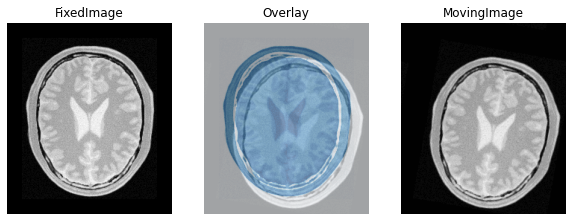

In [32]:
plt_overlay(fix_path,moving_path)

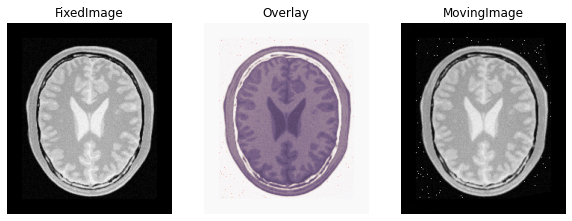

In [33]:
plt_overlay(fix_path,result_path)

## Affine Transformation
> The affine transform allows for shearing and scaling in addition to the rotation and translation. 

In [34]:
data_dir = r'./data/affine_example/'

fix_name = r'fixedImage.png'
moving_name = r'movingImage.png'
result_name = r'result.png'

fix_path = join(data_dir, fix_name)
moving_path = join(data_dir, moving_name)
result_path = join(data_dir, result_name)

fixedImage = imread(fix_path)
movingImage = imread(moving_path)

In [35]:
fixedImage = sitk.ReadImage(fix_path,sitk.sitkFloat32)
movingImage = sitk.ReadImage(moving_path,sitk.sitkFloat32)

# parameterMap = sitk.GetDefaultParameterMap("rigid")
# parameterMap["Transform"] = ["AffineTransform"]
# elastixImageFilter.SetParameterMap(parameterMap)

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("affine"))
elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()


In [36]:
sitk.WriteImage(sitk.Cast(resultImage,sitk.sitkUInt8),result_path)

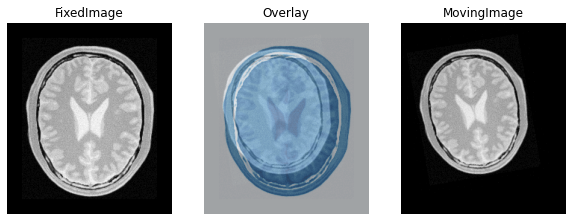

In [37]:
plt_overlay(fix_path,moving_path)

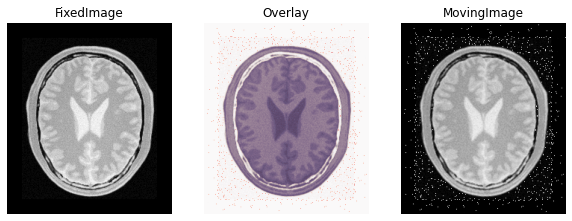

In [38]:
plt_overlay(fix_path,result_path)

## Non-rigid Registration
> Non-rigid registration methods are capable of aligning images where correspondence cannot be achieved without localized deformations and can therefore better accomodate anatomical, physiological and pathological variability between patients.

> B-splines are often used to parameterize a free-form deformation (FFD) field. This is a much harder registration problem than any of the previous examples due to a much higher-dimensional parameter space and we are therefore best off using a multi-resolution approach with affine initialization. This is very easy to do in SimpleElastix.

> The following code runs multi-resolution affine initialization and starts a non-rigid method multi-resolution non-rigid method using the affine transform as initialization :

In [39]:
data_dir = r'./data/van_tissue/'

fix_name = r'img1.tif'
moving_name = r'img2.tif'
result_name = r'result.tif'

fix_path = join(data_dir, fix_name)
moving_path = join(data_dir, moving_name)
result_path = join(data_dir, result_name)

fixedImage = imread(fix_path)
movingImage = imread(moving_path)

In [40]:
fixedImage = sitk.ReadImage(fix_path,sitk.sitkFloat32)
movingImage = sitk.ReadImage(moving_path,sitk.sitkFloat32)

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)

parameterMapVector = sitk.VectorOfParameterMap()
parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
elastixImageFilter.SetParameterMap(parameterMapVector)

elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()

In [41]:
sitk.WriteImage(resultImage,result_path)

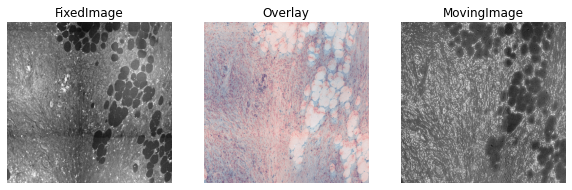

In [42]:
# Original Fix VS Original Moving
plt_overlay(fix_path,moving_path)

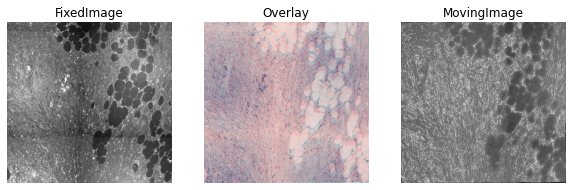

In [43]:
# Original Fix VS Registered Moving
plt_overlay(fix_path,result_path)

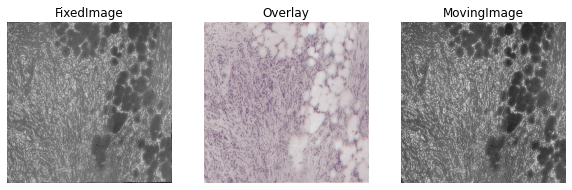

In [44]:
plt_overlay(result_path,moving_path)

## Point-based Registation
> Point-based registration allows us to help the registration via pre-defined sets of corresponding points. The CorrespondingPointsEuclideanDistanceMetric minimises the distance of between a points on the fixed image and corresponding points on the moving image. 

> The metric can be used to help in a difficult registration task by taking into account positions are known to correspond. Think of it as a way of embedding expert knowledge in the registration procedure. We can manually select points or automatically them via centroids of segmentations for example. Anything is possible.

> The CorrespondingPointsEuclideanDistanceMetric metric must be specified as the last metric due to technical constraints in elastix.

> To use CorrespondingPointsEuclideanDistanceMetric we append it to the list of metrics in the parameter map.

> https://simpleelastix.readthedocs.io/PointBasedRegistration.html

In [ ]:
parameterMap = sitk.GetDefaultParameterMap("bspline")
parameterMap["Metric"].append("CorrespondingPointsEuclideanDistanceMetric")

In [ ]:
# The metric can also be added to all metrics in the ElastixImageFilter object with a single call.
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.AddParameter( "Metric", "CorrespondingPointsEuclideanDistanceMetric" )